In [16]:
# Import necessary libraries
from main import *
import matplotlib.pyplot as plt

In [2]:
# Data Management
# processing path must include sentinel bands information vs mask data
processing_path = r"./data"
date_tag = get_date_tag()

scl_filename = 'imageExample_SCL.tif'
bands_filename = 'imageExample_Bands.tif'
file_scl = os.path.join(processing_path, scl_filename)
file_bands = os.path.join(processing_path, bands_filename)

In [3]:
#read and display mask data
scl_data = read_raster_data_xr(file_scl)
scl_data
filter_values = (scl_data == VEGETATION) | (scl_data == NOT_VEGETATED) | (scl_data == UNCLASSIFIED)
mask = scl_data.where(filter_values, 0)

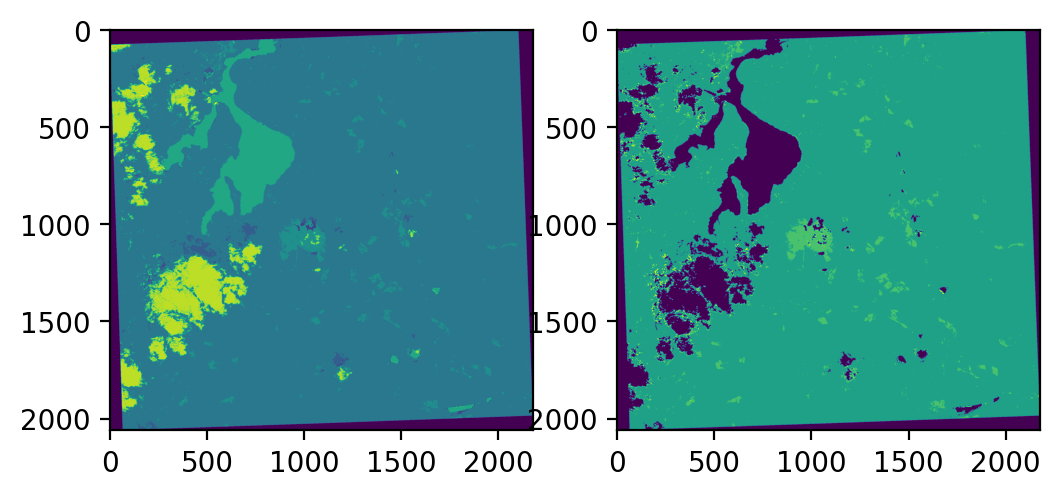

In [5]:
# Compare masked vs un-masked SCL data visually
fig, axs = plt.subplots(1, 2)
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 200

axs[0].imshow(scl_data[0])
axs[1].imshow(mask[0])

<BarContainer object of 4 artists>

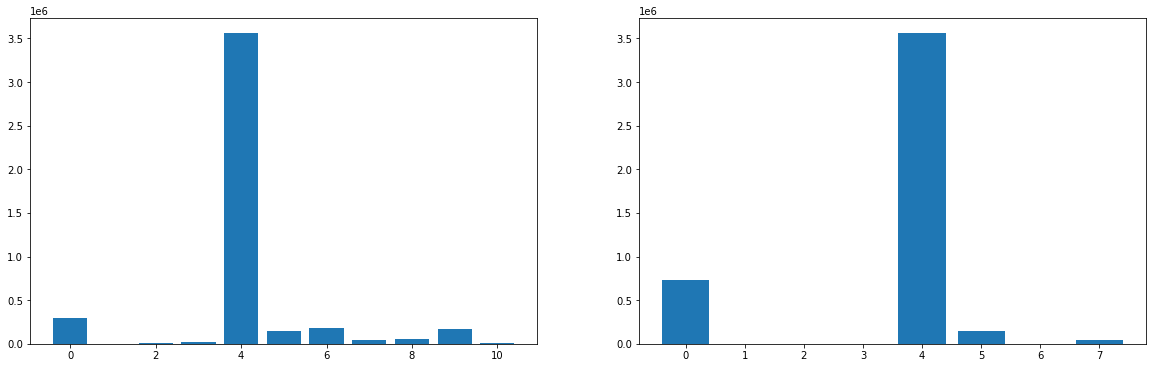

In [41]:
unique, frequency = np.unique(scl_data.values, return_counts=True)
unique_filtered, frequency_filtered = np.unique(mask, return_counts=True)

fig2, axs2 = plt.subplots(1, 2)
plt.rcParams['figure.figsize'] = [10, 3]

axs2[0].bar(unique, frequency)
axs2[1].bar(unique_filtered, frequency_filtered)

In [44]:
#Apply mask to the bands
bands_dataset = read_raster_data_xr(file_bands)
masked_bands = bands_dataset.where(filter_values.values, 0)
masked_bands

<xarray.DataArray (band: 10, y: 2057, x: 2177)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10
  * x            (x) float64 6.592e+05 6.592e+05 6.592e+05 ... 6.81e+05 6.81e+05
  * y            (y) float64 5.896e+06 5.896e+06 ... 5.875e+06 5.875e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     ('blue', 'green', 'red', 're1', 're2', 're3', 'nir', 're4'...

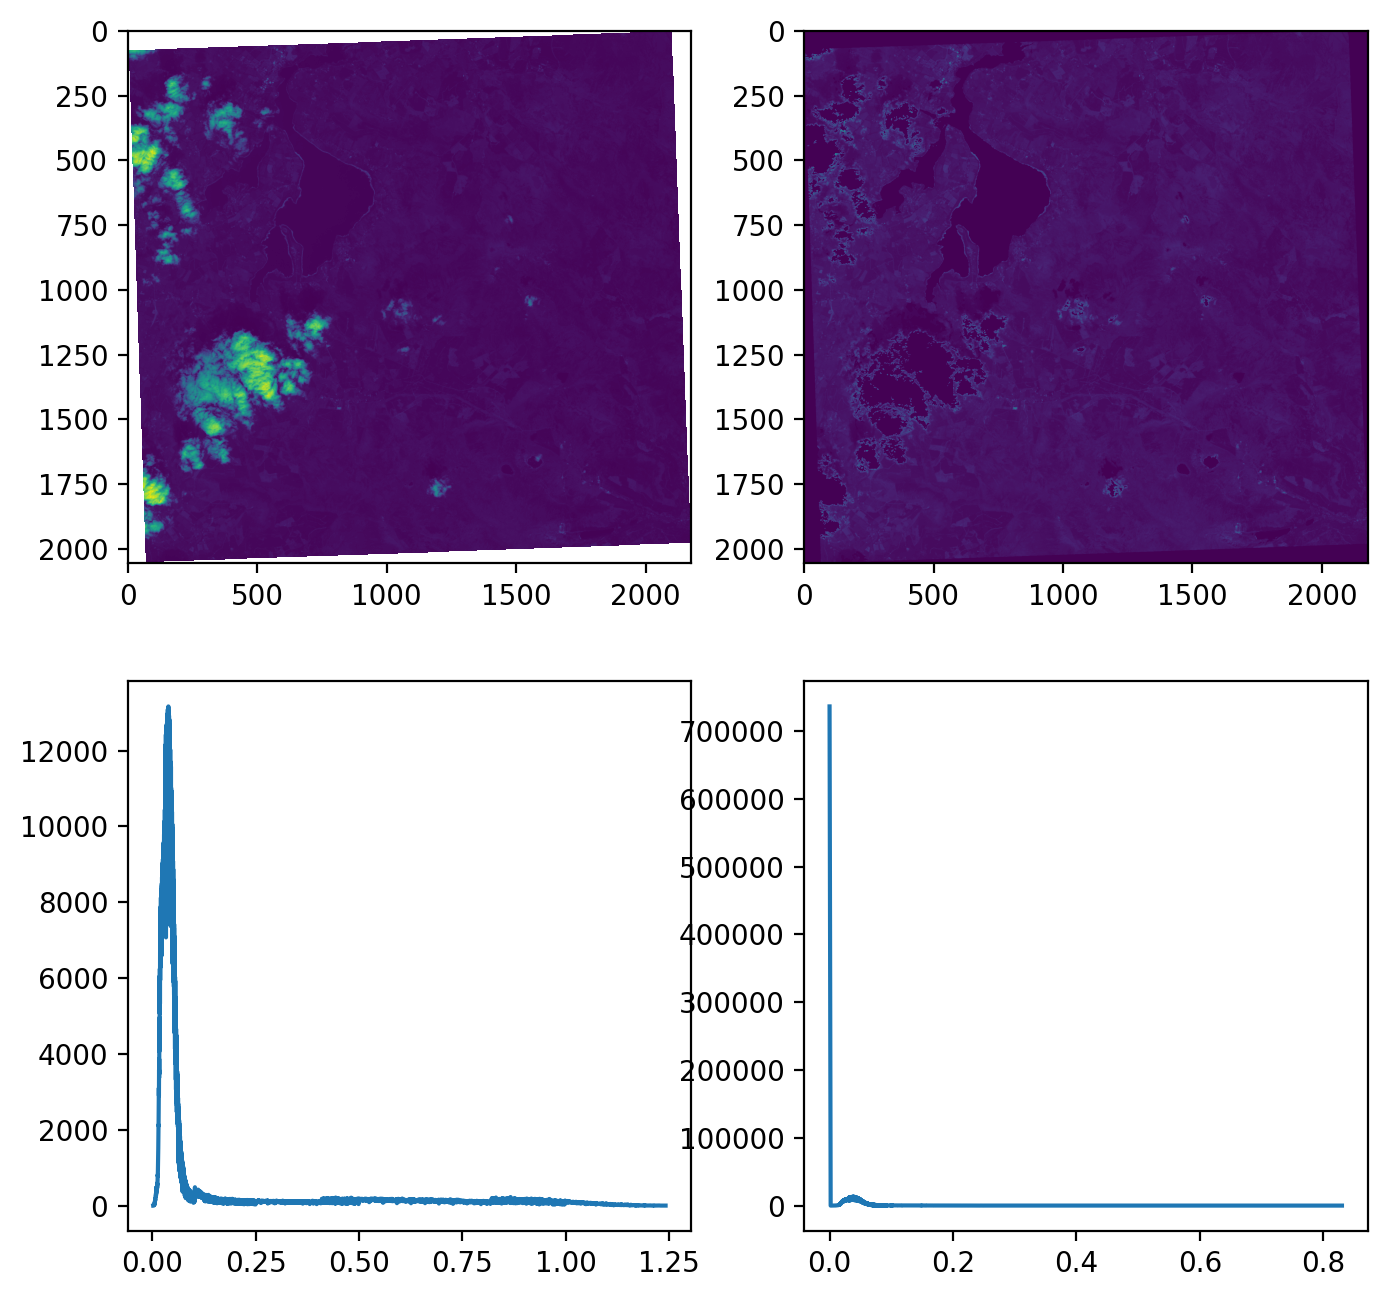

In [60]:
# Display the results
fig_3, axs_3 = plt.subplots(2, 2)
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 200

# Compare result for the first band
unique, frequency = np.unique(bands_dataset[0], return_counts=True)
unique_filtered, frequency_filtered = np.unique(masked_bands[0], return_counts=True)

axs_3[0, 0].imshow(bands_dataset[0])
axs_3[0, 1].imshow(masked_bands[0])
axs_3[1, 0].plot(unique, frequency)
axs_3[1, 1].plot(unique_filtered, frequency_filtered)
# Graphs compare visually the change in the masking process.

In [62]:
# Export to geotiff

masked_bands.rio.to_raster(os.path.join(processing_path, f'jupyter_output_{date_tag}.tif'))